In [1]:
import pandas as pd
import numpy as np
import plotly 
import os
import matplotlib.pyplot as plt


Bad key "text.kerning_factor" on line 4 in
C:\ProgramData\Anaconda3\envs\env_mlf\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test_patch.mplstyle.
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.1.3/matplotlibrc.template
or from the matplotlib source distribution


In [9]:
outputDir = '.'

X_df = pd.read_pickle('factor.pkl')
X_df.head()

,IBO001,R007,B0,IBO001_pctChange5,R007_pctChange5,B0_pctChange5,SHIBORO/N,SHIBOR1W,SHIBOR2W,SHIBOR1M,...,ETFVolatility120,ETFVolatility60_pctChange5,ETFVolatility120_pctChange5,mktVolume,mktVolume_pctChange5,mktClose_pctChange5,ETFReturn,ETFTomorrowUp,windAReturn,windATomorrowUp
date,,,,,,,,,,,,,,,,,,,,,
2007-09-03,1.8289,2.4612,2.4713,NaN,NaN,NaN,1.8197,2.4963,2.7768,2.9081,...,NaN,NaN,NaN,1.934243e+10,NaN,NaN,NaN,0.0,NaN,0.0
2007-09-04,1.8828,2.1780,2.1805,NaN,NaN,NaN,1.8860,2.2348,2.7740,2.9625,...,NaN,NaN,NaN,1.833770e+10,NaN,NaN,-0.016827,0.0,-0.009198,1.0
2007-09-05,1.8201,2.3618,2.3678,NaN,NaN,NaN,1.8122,2.3683,2.9631,3.0903,...,NaN,NaN,NaN,1.494567e+10,NaN,NaN,-0.002445,1.0,0.002539,1.0
2007-09-06,1.8173,2.4748,2.4389,NaN,NaN,NaN,1.8198,2.4385,3.2259,3.2956,...,NaN,NaN,NaN,1.626460e+10,NaN,NaN,0.012255,0.0,0.010107,0.0
2007-09-07,2.0160,2.8528,2.8629,NaN,NaN,NaN,2.0446,2.8066,3.5218,3.4738,...,NaN,NaN,NaN,1.825542e+10,NaN,NaN,-0.016949,1.0,-0.021509,1.0


IBO001                          211
R007                            211
B0                              212
IBO001_pctChange5               216
R007_pctChange5                 216
B0_pctChange5                   216
SHIBORO/N                       212
SHIBOR1W                        212
SHIBOR2W                        212
SHIBOR1M                        212
SHIBOR3M                        212
SHIBOR6M                        212
SHIBORO/N_pctChange5            216
SHIBOR1W_pctChange5             216
SHIBOR2W_pctChange5             216
SHIBOR1M_pctChange5             216
SHIBOR3M_pctChange5             216
SHIBOR6M_pctChange5             216
国债到期收益率:6个月                     390
国债到期收益率:1年                      363
国债到期收益率:2年                      361
国债到期收益率:6个月_pctChange5          287
国债到期收益率:1年_pctChange5           287
国债到期收益率:2年_pctChange5           287
南华综合指数                          293
CRB现货指数:综合                      190
期货收盘价(连续):COMEX黄金               255
期货结算价(连续):布伦特原油             

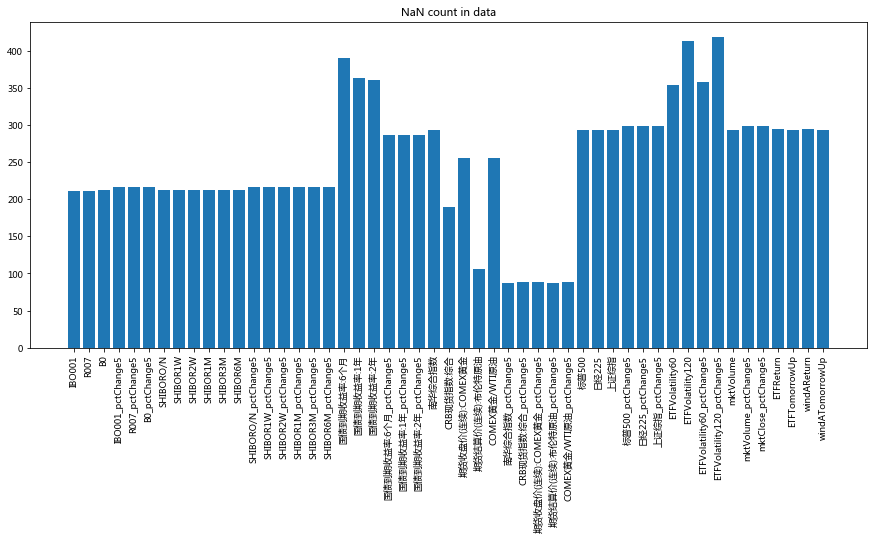

In [10]:
from pylab import * 
import matplotlib
matplotlib.rcParams['font.family'] = 'Microsoft YaHei'
mpl.rcParams['font.sans-serif'] = ['Microsoft YaHei'] #更新字体格式
mpl.rcParams['font.size'] = 9 

nas_df = X_df.isna()
print(X_df.isna().sum())

plt.figure(figsize = (15, 6))
plt.title('NaN count in data')
plt.xticks(rotation='vertical')
plt.bar(nas_df.sum().index, nas_df.sum().values)
plt.show()

国债到期收益率:6个月           29
国债到期收益率:1年             2
国债到期收益率:2年             1
CRB现货指数:综合            97
期货收盘价(连续):COMEX黄金    159
期货结算价(连续):布伦特原油       22
COMEX黄金/WTI原油        159
dtype: int64


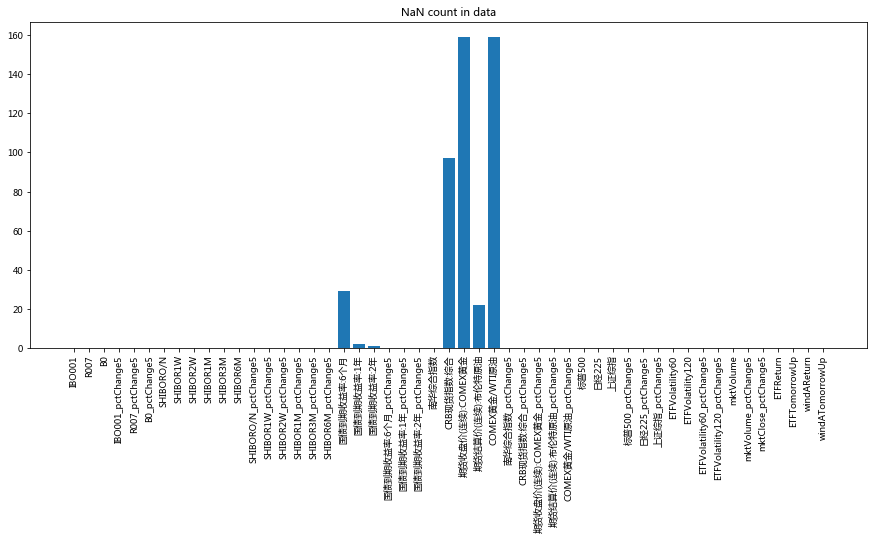

In [11]:
XDroped_df = X_df.loc['2008-04':].dropna(axis = 0, thresh=35)

print(XDroped_df.isna().sum()[XDroped_df.isna().sum()>0])
nas_df = XDroped_df.isna()
plt.figure(figsize = (15, 6))
plt.title('NaN count in data')
plt.xticks(rotation='vertical')
plt.bar(nas_df.sum().index, nas_df.sum().values)
plt.show()

他有幾天 原油跟黃金都 0 
国债到期收益率:6个月 也會有 0 pct_change 遇到倆倆都 0 就 nan 了

In [12]:
XFilled_df = XDroped_df.fillna(method = 'ffill')
for date in XDroped_df.loc[XDroped_df['期货收盘价(连续):COMEX黄金'].isna()].index: print(date)
XDroped_df.ix[XDroped_df['国债到期收益率:6个月_pctChange5'].isna(), 25:]

XFilled_df.head()

2008-05-26 00:00:00
2008-07-04 00:00:00
2008-09-01 00:00:00
2008-11-27 00:00:00
2008-12-25 00:00:00
2009-01-19 00:00:00
2009-02-16 00:00:00
2009-04-10 00:00:00
2009-05-25 00:00:00
2009-07-03 00:00:00
2009-09-07 00:00:00
2009-11-26 00:00:00
2009-12-25 00:00:00
2010-01-18 00:00:00
2010-04-02 00:00:00
2010-05-31 00:00:00
2010-07-05 00:00:00
2010-09-06 00:00:00
2010-11-24 00:00:00
2010-11-25 00:00:00
2010-12-24 00:00:00
2011-01-17 00:00:00
2011-02-21 00:00:00
2011-04-22 00:00:00
2011-05-30 00:00:00
2011-07-04 00:00:00
2011-09-05 00:00:00
2011-11-24 00:00:00
2011-12-26 00:00:00
2012-01-16 00:00:00
2012-02-20 00:00:00
2012-04-06 00:00:00
2012-05-28 00:00:00
2012-07-04 00:00:00
2012-09-03 00:00:00
2012-11-22 00:00:00
2012-12-25 00:00:00
2012-12-31 00:00:00
2013-01-07 00:00:00
2013-01-21 00:00:00
2013-02-18 00:00:00
2013-03-26 00:00:00
2013-03-29 00:00:00
2013-05-27 00:00:00
2013-07-04 00:00:00
2013-09-02 00:00:00
2013-09-25 00:00:00
2013-11-08 00:00:00
2013-11-28 00:00:00
2013-12-03 00:00:00


C:\ProgramData\Anaconda3\envs\env_mlf\lib\site-packages\ipykernel_launcher.py:3: FutureWarning:


.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#ix-indexer-is-deprecated

C:\ProgramData\Anaconda3\envs\env_mlf\lib\site-packages\pandas\core\indexing.py:822: FutureWarning:


.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#ix-indexer-is-deprecated



,IBO001,R007,B0,IBO001_pctChange5,R007_pctChange5,B0_pctChange5,SHIBORO/N,SHIBOR1W,SHIBOR2W,SHIBOR1M,...,ETFVolatility120,ETFVolatility60_pctChange5,ETFVolatility120_pctChange5,mktVolume,mktVolume_pctChange5,mktClose_pctChange5,ETFReturn,ETFTomorrowUp,windAReturn,windATomorrowUp
date,,,,,,,,,,,,,,,,,,,,,
2008-04-01,2.5561,3.0938,3.0937,0.249621,0.298171,0.298238,2.5914,3.1008,2.9951,3.3039,...,0.000623,0.116756,0.061890,8.132457e+09,0.044804,-0.095947,-0.038328,1.0,-0.059130,0.0
2008-04-02,2.3647,3.1501,3.1493,0.138901,0.279592,0.280464,2.3718,3.1539,3.6907,3.3183,...,0.000622,0.130007,0.063483,9.233396e+09,0.347541,-0.113417,0.010870,1.0,-0.018631,1.0
2008-04-03,2.3489,2.7830,2.7917,0.129768,0.166974,0.171162,2.3610,2.7796,3.6332,3.3685,...,0.000630,0.122711,0.055455,7.351010e+09,-0.074038,-0.047096,0.028674,1.0,0.026610,1.0
2008-04-07,2.3274,3.2303,3.2330,0.028458,0.351138,0.354931,2.3238,3.2093,3.5210,3.5117,...,0.000646,0.096784,0.043617,8.805947e+09,-0.040062,-0.034606,0.041812,0.0,0.054459,1.0
2008-04-08,2.3486,3.5846,3.5853,0.023846,0.240174,0.240288,2.3385,3.4941,3.9874,3.6742,...,0.000638,0.087797,0.023199,9.586918e+09,0.385330,0.012665,-0.003344,0.0,0.013138,0.0


In [13]:
print(np.isfinite(XFilled_df).all())
for aColumn in XFilled_df.columns:
    print(aColumn, XFilled_df[~np.isposinf(XFilled_df)].max()[aColumn])
    XFilled_df.loc[np.isinf(XFilled_df)[aColumn], aColumn] = XFilled_df[~np.isposinf(XFilled_df)].max()[aColumn]

IBO001                          True
R007                            True
B0                              True
IBO001_pctChange5               True
R007_pctChange5                 True
B0_pctChange5                   True
SHIBORO/N                       True
SHIBOR1W                        True
SHIBOR2W                        True
SHIBOR1M                        True
SHIBOR3M                        True
SHIBOR6M                        True
SHIBORO/N_pctChange5            True
SHIBOR1W_pctChange5             True
SHIBOR2W_pctChange5             True
SHIBOR1M_pctChange5             True
SHIBOR3M_pctChange5             True
SHIBOR6M_pctChange5             True
国债到期收益率:6个月                     True
国债到期收益率:1年                      True
国债到期收益率:2年                      True
国债到期收益率:6个月_pctChange5          True
国债到期收益率:1年_pctChange5           True
国债到期收益率:2年_pctChange5           True
南华综合指数                          True
CRB现货指数:综合                      True
期货收盘价(连续):COMEX黄金               True
期

# 去個極值呀˙˙
![image](https://i2.kknews.cc/SIG=3rto9q7/5r8200046s68q2o6q7q5.jpg)

In [14]:
def cutExtreme(XFilled_df, n = 3.5):
    MAD_s = XFilled_df.mad()
    upper_s = XFilled_df.median()+n*MAD_s
    lower_s = XFilled_df.median()-n*MAD_s
    X_df = XFilled_df

    for aColumn in X_df.columns:
        X_df.loc[X_df[aColumn]>upper_s[aColumn], aColumn] = upper_s[aColumn]
        X_df.loc[X_df[aColumn]<lower_s[aColumn], aColumn] = lower_s[aColumn]

    XNoExtreme_df = X_df
    return(XNoExtreme_df)

XNoExtreme_df = cutExtreme(XFilled_df, n = 3.5)

XNoExtreme_df.to_csv(os.path.join(outputDir, 'cleanedFactor.csv'))
XNoExtreme_df.to_pickle(os.path.join(outputDir, 'cleanedFactor.pkl'))

# 突然發現不能這麼幹呀

必須要切好 train test 才能這麼幹呢
那就先存好上面的資料囉，我們這下面的東西就是康康一下哈

In [15]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

In [16]:
scaler = StandardScaler().fit(XNoExtreme_df)
XTmp_df = pd.DataFrame(scaler.transform(XNoExtreme_df), index=XNoExtreme_df.index, columns=XNoExtreme_df.columns)
XTmp_df

,IBO001,R007,B0,IBO001_pctChange5,R007_pctChange5,B0_pctChange5,SHIBORO/N,SHIBOR1W,SHIBOR2W,SHIBOR1M,...,ETFVolatility120,ETFVolatility60_pctChange5,ETFVolatility120_pctChange5,mktVolume,mktVolume_pctChange5,mktClose_pctChange5,ETFReturn,ETFTomorrowUp,windAReturn,windATomorrowUp
date,,,,,,,,,,,,,,,,,,,,,
2008-04-01,0.222875,0.123338,0.124900,1.581699,1.771664,1.772523,0.308402,0.259597,-0.174601,-0.163204,...,1.240911,1.028612,1.107296,-1.152529,0.033252,-2.643469,-2.534179,1.217916,-2.676848,-1.076273
2008-04-02,-0.012652,0.179987,0.180823,0.862891,1.657231,1.663032,0.036483,0.315946,0.449708,-0.151686,...,1.240025,1.146165,1.134813,-1.094256,1.126745,-2.693908,0.701831,1.217916,-1.247187,0.929132
2008-04-03,-0.032094,-0.189389,-0.178853,0.803597,0.963559,0.989719,0.023110,-0.081257,0.398101,-0.111533,...,1.271356,1.081442,0.996094,-1.193891,-0.396010,-1.326744,1.872933,1.217916,1.689691,0.929132
2008-04-07,-0.058551,0.260684,0.265009,0.145882,2.097916,2.121763,-0.022953,0.374736,0.297400,0.003008,...,1.332297,0.851441,0.791517,-1.116881,-0.273287,-0.990103,2.639537,-0.821075,2.726346,0.929132
2008-04-08,-0.032463,0.617180,0.619355,0.115941,1.414436,1.415543,-0.004751,0.676962,0.716000,0.132986,...,1.301681,0.771718,0.438664,-1.075543,1.263240,0.284023,-0.233119,-0.821075,0.815151,-1.076273
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-03-02,-0.724893,-0.685142,-0.689200,0.712717,-0.185679,-0.200491,-0.778038,-0.771666,-1.021942,-0.990184,...,-0.669035,1.559269,1.815036,2.651875,-0.462168,-0.752645,2.093589,1.217916,2.298928,0.929132
2020-03-03,-0.840073,-0.733037,-0.732751,0.037988,-0.314726,-0.319995,-0.891957,-0.808808,-1.076691,-1.022978,...,-0.669063,1.475471,1.752054,2.651875,-0.623107,-0.535879,0.213685,1.217916,0.546764,0.929132
2020-03-04,-1.025516,-0.807798,-0.810701,-0.177753,-0.487689,-0.489118,-1.090077,-0.853378,-1.100026,-1.066971,...,-0.667157,1.444817,2.056747,2.651875,-1.031975,0.103331,0.664977,1.217916,0.301016,0.929132


In [17]:
import pandas_profiling 
X_df = XTmp_df
profile = pandas_profiling.ProfileReport(X_df)
profile.to_file(outputfile="standardScaledReport.html")
profile

C:\ProgramData\Anaconda3\envs\env_mlf\lib\site-packages\pandas_profiling\describe.py:392: FutureWarning:

The join_axes-keyword is deprecated. Use .reindex or .reindex_like on the result to achieve the same functionality.

C:\ProgramData\Anaconda3\envs\env_mlf\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning:

Glyph 22269 missing from current font.

C:\ProgramData\Anaconda3\envs\env_mlf\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning:

Glyph 20538 missing from current font.

C:\ProgramData\Anaconda3\envs\env_mlf\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning:

Glyph 21040 missing from current font.

C:\ProgramData\Anaconda3\envs\env_mlf\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning:

Glyph 26399 missing from current font.

C:\ProgramData\Anaconda3\envs\env_mlf\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning:

Glyph 25910 missing from current font.

C:\ProgramDa

Number of variables,52
Number of observations,2903
Total Missing (%),0.0%
Total size in memory,1.2 MiB
Average record size in memory,416.0 B
Numeric,34
Categorical,0
Boolean,2
Date,1
Text (Unique),0
Rejected,15


In [18]:
scaler = MinMaxScaler().fit(XNoExtreme_df)
XTmp_df = pd.DataFrame(scaler.transform(XNoExtreme_df), index=XNoExtreme_df.index, columns=XNoExtreme_df.columns)
XTmp_df

,IBO001,R007,B0,IBO001_pctChange5,R007_pctChange5,B0_pctChange5,SHIBORO/N,SHIBOR1W,SHIBOR2W,SHIBOR1M,...,ETFVolatility120,ETFVolatility60_pctChange5,ETFVolatility120_pctChange5,mktVolume,mktVolume_pctChange5,mktClose_pctChange5,ETFReturn,ETFTomorrowUp,windAReturn,windATomorrowUp
date,,,,,,,,,,,,,,,,,,,,,
2008-04-01,0.452718,0.465334,0.465348,0.803413,0.844081,0.844715,0.468206,0.499952,0.397964,0.386438,...,0.641412,0.696430,0.705061,0.049185,0.488894,0.009216,0.024809,1.0,0.000000,0.0
2008-04-02,0.403196,0.477126,0.476993,0.668999,0.822718,0.824265,0.410785,0.511915,0.530409,0.388868,...,0.641163,0.717713,0.710138,0.063749,0.698820,0.000000,0.634763,1.0,0.264595,1.0
2008-04-03,0.399107,0.400237,0.402095,0.657911,0.693224,0.698511,0.407961,0.427594,0.519461,0.397337,...,0.649962,0.705995,0.684544,0.038848,0.406486,0.249798,0.855503,1.0,0.808140,1.0
2008-04-07,0.393545,0.493923,0.494524,0.534921,0.904985,0.909942,0.398234,0.524395,0.498097,0.421495,...,0.667077,0.664355,0.646801,0.058094,0.430046,0.311307,1.000000,0.0,1.000000,1.0
2008-04-08,0.399030,0.568131,0.568312,0.529322,0.777394,0.778042,0.402078,0.588553,0.586902,0.448910,...,0.658479,0.649921,0.581700,0.068426,0.725024,0.544106,0.458535,0.0,0.646284,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-03-02,0.253436,0.297041,0.295822,0.640917,0.478685,0.476215,0.238784,0.281030,0.218203,0.212013,...,0.105016,0.792503,0.835637,1.000000,0.393785,0.354694,0.897094,1.0,0.920895,1.0
2020-03-03,0.229218,0.287071,0.286753,0.514745,0.454594,0.453895,0.214727,0.273146,0.206589,0.205096,...,0.105008,0.777332,0.824017,1.000000,0.362889,0.394300,0.542752,1.0,0.596612,1.0
2020-03-04,0.190226,0.271509,0.270521,0.474403,0.422306,0.422308,0.172891,0.263684,0.201638,0.195817,...,0.105544,0.771782,0.880232,1.000000,0.284396,0.511091,0.627816,1.0,0.551130,1.0


In [19]:
X_df = XTmp_df
profile = pandas_profiling.ProfileReport(X_df)
profile.to_file(outputfile="minMaxScaledReport.html")
profile

C:\ProgramData\Anaconda3\envs\env_mlf\lib\site-packages\pandas_profiling\describe.py:392: FutureWarning:

The join_axes-keyword is deprecated. Use .reindex or .reindex_like on the result to achieve the same functionality.

C:\ProgramData\Anaconda3\envs\env_mlf\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning:

Glyph 22269 missing from current font.

C:\ProgramData\Anaconda3\envs\env_mlf\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning:

Glyph 20538 missing from current font.

C:\ProgramData\Anaconda3\envs\env_mlf\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning:

Glyph 21040 missing from current font.

C:\ProgramData\Anaconda3\envs\env_mlf\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning:

Glyph 26399 missing from current font.

C:\ProgramData\Anaconda3\envs\env_mlf\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning:

Glyph 25910 missing from current font.

C:\ProgramDa

Number of variables,52
Number of observations,2903
Total Missing (%),0.0%
Total size in memory,1.2 MiB
Average record size in memory,416.0 B
Numeric,34
Categorical,0
Boolean,2
Date,1
Text (Unique),0
Rejected,15
